In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [27]:
df=pd.read_csv('/content/train (2).csv')

In [28]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [29]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [32]:
df.drop(['LotFrontage','Alley','MiscFeature','PoolQC'],axis=1,inplace=True)


In [33]:
df['BsmtQual']=df.fillna(df['BsmtQual'].mode()[0],inplace=True)
df['Fence']=df.fillna(df['Fence'].mode()[0],inplace=True)
df['GarageQual']=df.fillna(df['GarageQual'].mode()[0],inplace=True)
df['GarageCond']=df.fillna(df['GarageCond'].mode()[0],inplace=True)
df['FireplaceQu']=df.fillna(df['FireplaceQu'].mode()[0],inplace=True)
df['GarageType']=df.fillna(df['GarageType'].mode()[0],inplace=True)
df['GarageYrBlt']=df.fillna(df['GarageYrBlt'].mode()[0],inplace=True)
df['GarageFinish']=df.fillna(df['GarageFinish'].mode()[0],inplace=True)
df['Electrical']=df.fillna(df['Electrical'].mode()[0],inplace=True)
df['BsmtFinType2']=df.fillna(df['BsmtFinType2'].mode()[0],inplace=True)
df['BsmtFinType1']=df.fillna(df['BsmtFinType1'].mode()[0],inplace=True)
df['BsmtCond']=df.fillna(df['BsmtCond'].mode()[0],inplace=True)
df['BsmtExposure']=df.fillna(df['BsmtExposure'].mode()[0],inplace=True)
df['MasVnrType']=df.fillna(df['MasVnrType'].mode()[0],inplace=True)
df['MasVnrArea']=df.fillna(df['MasVnrArea'].mode()[0],inplace=True)





<ipython-input-33-abccc73cd6e4>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['BsmtQual']=df.fillna(df['BsmtQual'].mode()[0],inplace=True)


In [34]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [35]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = pd.Categorical(df[column]).codes

In [36]:
df['Roof'] = df[['RoofStyle', 'RoofMatl']].sum(axis=1, skipna=True)
df['Exterior'] = df[['Exterior1st', 'Exterior2nd']].sum(axis=1, skipna=True)
df['MasVnr'] = df[['MasVnrType', 'MasVnrArea']].sum(axis=1, skipna=True)
df['Exter'] = df[[ 'ExterQual',
       'ExterCond']].sum(axis=1, skipna=True)
df['Bsmt'] = df[['BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF']].sum(axis=1, skipna=True)
df['FlrSF'] = df[['1stFlrSF', '2ndFlrSF']].sum(axis=1, skipna=True)

df['Bath'] = df[['BsmtFullBath',
       'BsmtHalfBath','FullBath', 'HalfBath']].sum(axis=1, skipna=True)
df['Kitchen'] = df[['KitchenAbvGr', 'KitchenQual']].sum(axis=1, skipna=True)
df['Garage'] = df[['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].sum(axis=1, skipna=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int8   
 5   LotShape       1460 non-null   int8   
 6   LandContour    1460 non-null   int8   
 7   Utilities      1460 non-null   int8   
 8   LotConfig      1460 non-null   int8   
 9   LandSlope      1460 non-null   int8   
 10  Neighborhood   1460 non-null   int8   
 11  Condition1     1460 non-null   int8   
 12  Condition2     1460 non-null   int8   
 13  BldgType       1460 non-null   int8   
 14  HouseStyle     1460 non-null   int8   
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [38]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int8   
 5   LotShape       1460 non-null   int8   
 6   LandContour    1460 non-null   int8   
 7   Utilities      1460 non-null   int8   
 8   LotConfig      1460 non-null   int8   
 9   LandSlope      1460 non-null   int8   
 10  Neighborhood   1460 non-null   int8   
 11  Condition1     1460 non-null   int8   
 12  Condition2     1460 non-null   int8   
 13  BldgType       1460 non-null   int8   
 14  HouseStyle     1460 non-null   int8   
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [41]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [42]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
model=LinearRegression()
model.fit(train_x,train_y)
y_pred=model.predict(test_x)

<Axes: xlabel='SalePrice'>

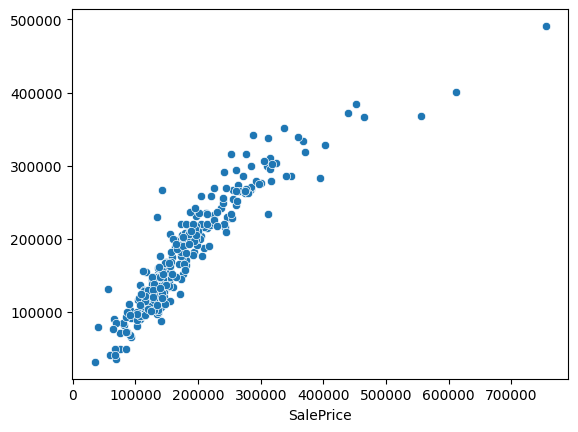

In [44]:
sns.scatterplot(x=test_y,y=y_pred)

In [46]:
mse=mean_squared_error(test_y,y_pred)
r2=r2_score(test_y,y_pred)
accuracy_score=model.score(test_x,test_y)

In [48]:
print('Mean Squared Error:',mse)
print('R-squared:',r2)
print('Accuracy Score:',accuracy_score)

Mean Squared Error: 1207906924.134102
R-squared: 0.8425220920849118
Accuracy Score: 0.8425220920849118
